<a href="https://colab.research.google.com/github/dammkevin/stock_price_prediction/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [8]:
# Acquire the stock quote
df = yf.download('AAPL', start='2012-01-01', end='2022-12-17')

# Show the data
df

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2012-01-03 00:00:00+00:00,12.388998,14.686786,14.732143,14.607143,14.621429,302220800
2012-01-04 00:00:00+00:00,12.455577,14.765714,14.810000,14.617143,14.642857,260022000
2012-01-05 00:00:00+00:00,12.593856,14.929643,14.948214,14.738214,14.819643,271269600
2012-01-06 00:00:00+00:00,12.725511,15.085714,15.098214,14.972143,14.991786,318292800
2012-01-09 00:00:00+00:00,12.705330,15.061786,15.276786,15.048214,15.196429,394024400
...,...,...,...,...,...,...
2022-12-12 00:00:00+00:00,142.986374,144.490005,144.500000,141.059998,142.699997,70462700
2022-12-13 00:00:00+00:00,143.956161,145.470001,149.970001,144.240005,149.500000,93886200


In [9]:
# Get the number of rows and columns in the data set
df.shape

(2759, 6)

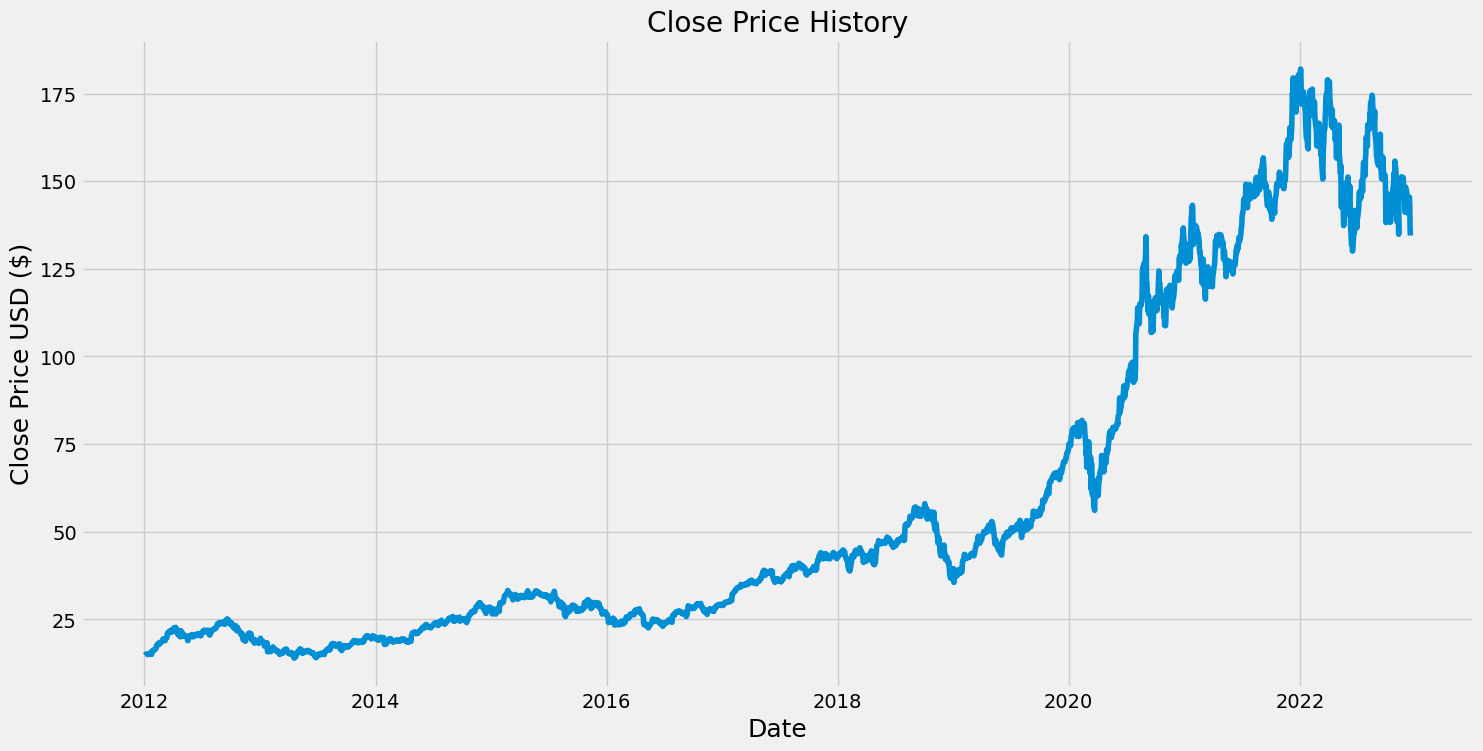

In [12]:
# Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()